# Questão 1

In [30]:
from dataclasses import dataclass
from typing import List
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class MLEGaussian:
    sigma2: float
    mu_true: float
    sample: list[float]

    def get_score_function(self, interval: tuple, size: int, plot: bool = False):
        interval_values = np.linspace(interval[0], interval[1], size)
        score_function = (1 / self.sigma2) * (np.sum(self.sample) - len(self.sample) * interval_values)
        mu_optimal = np.sum(self.sample) / len(self.sample)

        if plot:
            plt.figure()
            plt.plot(interval_values, score_function)
            plt.axvline(x=self.mu_true, color="green")
            plt.axvline(x=mu_optimal, color="red")
            plt.grid()
            plt.legend(["Score Function", "True Value", r"$\hat{\mu}(y)$"])
            plt.show()

        return score_function, mu_optimal


def compare_optmizers(optimizers: List[MLEGaussian], interval: tuple, size: int, mu_true: float):
    score_function_list = []
    mu_hat_list = []

    for opt in optimizers:
        score_values, mu_hat = opt.get_score_function(interval, size)
        score_function_list.append(score_values)
        mu_hat_list.append(mu_hat)

    plt.figure()
    interval_values = np.linspace(interval[0], interval[1], size)
    for idx, (sc_f, mu_h) in enumerate(zip(score_function_list, mu_hat_list)):
        print(f"mu_hat_{idx+1} = {mu_h}")
        plt.plot(interval_values, sc_f, color=f"C{idx}", label=f"Sample {idx+1}")
        plt.axvline(x=mu_h, ls="--", color=f"C{idx}", label=r"$\hat{\mu}" + f"{idx+1}" + r"$")
    plt.axvline(x=mu_true, color="red", label="True Value")
    plt.legend()
    plt.grid()
    plt.show()


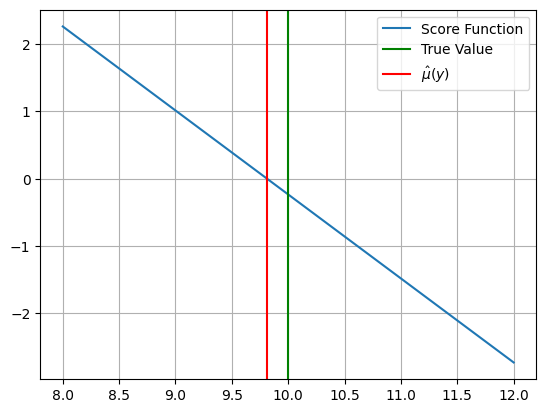

mu_hat_1 = 9.812000000000001
mu_hat_2 = 10.086000000000002


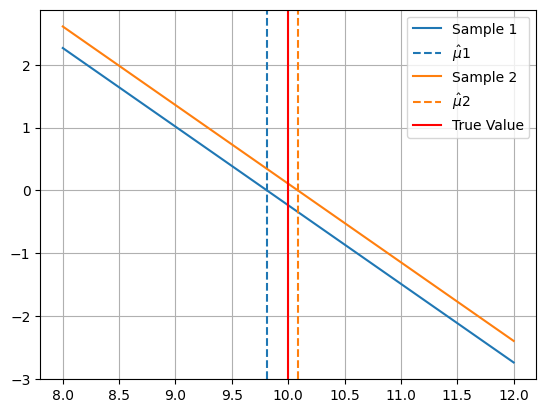

In [31]:
mle1 = MLEGaussian(4.0, 10.0, [10.82, 9.76, 10.55, 7.09, 10.84])
mle1.get_score_function((8, 12), 10, plot=True)

mle2 = MLEGaussian(4.0, 10.0, [12.98, 10.73, 8.49, 8.45, 9.78])
mle2.get_score_function((8, 12), 10)

compare_optmizers([mle1, mle2], (8, 12), 10, 10.0)

É possível notar que na primeira imagem, o valor de $\frac{\partial \ell}{\partial \mu}$ não é zero no ponto $\mu$=10, que seria o valor real do parâmetro. Isso mostra duas coisas, que o valor de $\hat{\mu}$ estimado pelo MLE é não viciado, oscilando em torno do valor real e que com uma amostra de tamanho `n=5` pode não ser suficiente para $\hat{\mu}$ ser aproximadamente $\mu$. Afinal sabe-se que a informação de Fisher aumenta linearmente com o tamanho da amostra.

No caso o valor obtido para $\hat{\mu}$ foi de: $\hat{\mu}$ = 9.812000000000001. Logo a função score $\frac{\partial \ell}{\partial \mu}$ é zero nesse ponto.

Já na segunda figura, onde são plotas as funções score para as duas amostras fornecidas, é possível notar que os estimadores são de fato não viciados, oscilando em torno do valor real de $\mu$. No caso da seguinte amostra o $\hat{\mu}$ = 10.086000000000002, ficando bem mais próxima ao valor real do que primeira amostra. Onde a função score dela é zero.

Sabendo que a função score $\frac{\partial \ell}{\partial \mu}$ é dada por: 

$\frac{\partial \ell}{\partial \mu}$ = $\frac{1}{\sigma^2} \sum_{i=1}^n Y_i - \mu$

O ponto de ótimo é onde $\frac{\partial \ell}{\partial \mu}$ é quando a função, dada uma amostra, é igual a zero. Esse valor de máxima verossimilhança pode ser dado por simplesmente pela média da amostra.

$\frac{1}{\sigma^2} \sum_{i=1}^n Y_i - \mu$ = 0   ->  $\hat{\mu}$ = $\frac{\sum_{i=1}^n Y_i}{n}$